In [143]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
tasa_suicidios = pd.read_csv("master.csv", header="infer", sep=",")
tasa_suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [145]:
tasa_suicidios.shape

(27820, 12)

In [146]:
tasa_suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [147]:
tasa_suicidios.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [148]:
null_summary = (
    tasa_suicidios.isna().sum().reset_index()
    .rename(columns={"index": "variable", 0: "count"})
    .assign(percent = lambda x: 100 * x["count"] / tasa_suicidios.shape[0])
    .sort_values(by="count", ascending=True)
)

print(null_summary)

              variable  count    percent
0              country      0   0.000000
1                 year      0   0.000000
2                  sex      0   0.000000
3                  age      0   0.000000
4          suicides_no      0   0.000000
5           population      0   0.000000
6    suicides/100k pop      0   0.000000
7         country-year      0   0.000000
9    gdp_for_year ($)       0   0.000000
10  gdp_per_capita ($)      0   0.000000
11          generation      0   0.000000
8         HDI for year  19456  69.935298


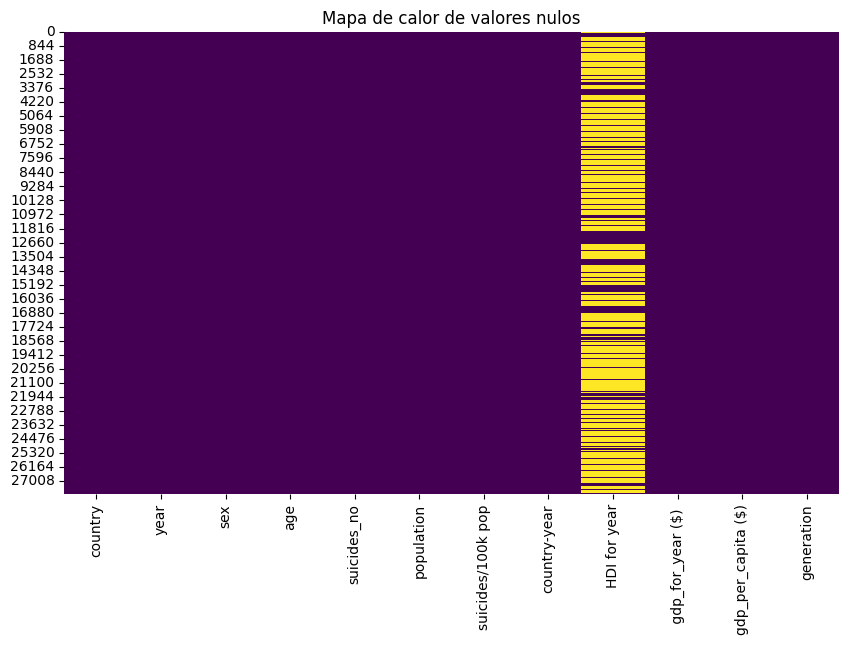

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(tasa_suicidios.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

🚧 Solo la varible HDI for year tiene datos faltantes, con un porcentaje de 69,9%

In [112]:
## Calcular promedio de año y país para llenar los datos faltantes
tasa_suicidios['HDI for year'] = tasa_suicidios.groupby(['country', 'year'])['HDI for year'].transform(lambda x: x.fillna(x.mean()))

In [113]:
missing_values_after = tasa_suicidios['HDI for year'].isnull().sum()
missing_values_after

np.int64(19456)

🚧 Aunque se intentó sacar promedio de año y país para eliminar los datos faltantes siguen habiendo muchos datos a los cuales no se pudo sacar un promedio, por tanto, se tomó la decisión de eliminar esta columna

In [114]:
tasa_suicidios.drop(columns=['HDI for year'], inplace=True)

In [115]:
tasa_suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [116]:
tasa_suicidios.duplicated().sum()

np.int64(0)

🚧 No existen datos duplicados

In [117]:
tasa_suicidios.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [118]:
tasa_suicidios.describe(include="object")

,country,sex,age,country-year,gdp_for_year ($)
count,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321
top,Austria,male,15-24 years,Uzbekistan2014,"63,067,077,179"
freq,382,13910,4642,12,12


✨  Tasa de suicidios en cada país

In [119]:
suicidios_por_pais = tasa_suicidios.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)
print("Total de suicidios por país (Top 10):")
print(suicidios_por_pais)

Total de suicidios por país (Top 10):
country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64


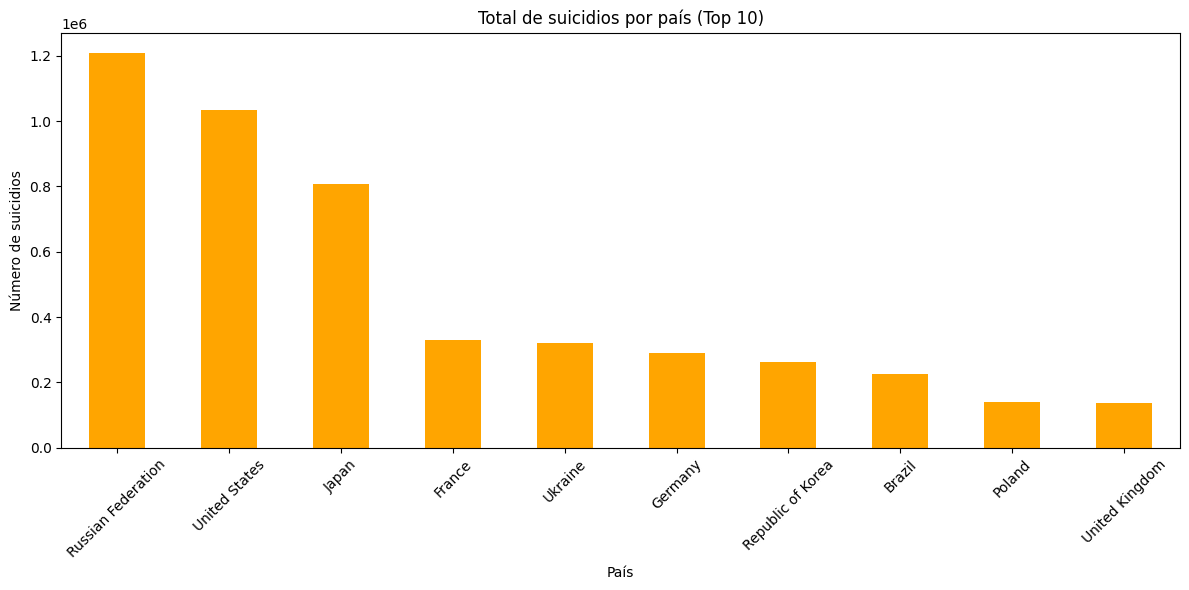

In [120]:
# Graficar los 10 países con más suicidios
plt.figure(figsize=(12, 6))
suicidios_por_pais.plot(kind='bar', color='orange') 
plt.title('Total de suicidios por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\4015387293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_suicide.index, x=country_suicide.values, palette="GnBu")


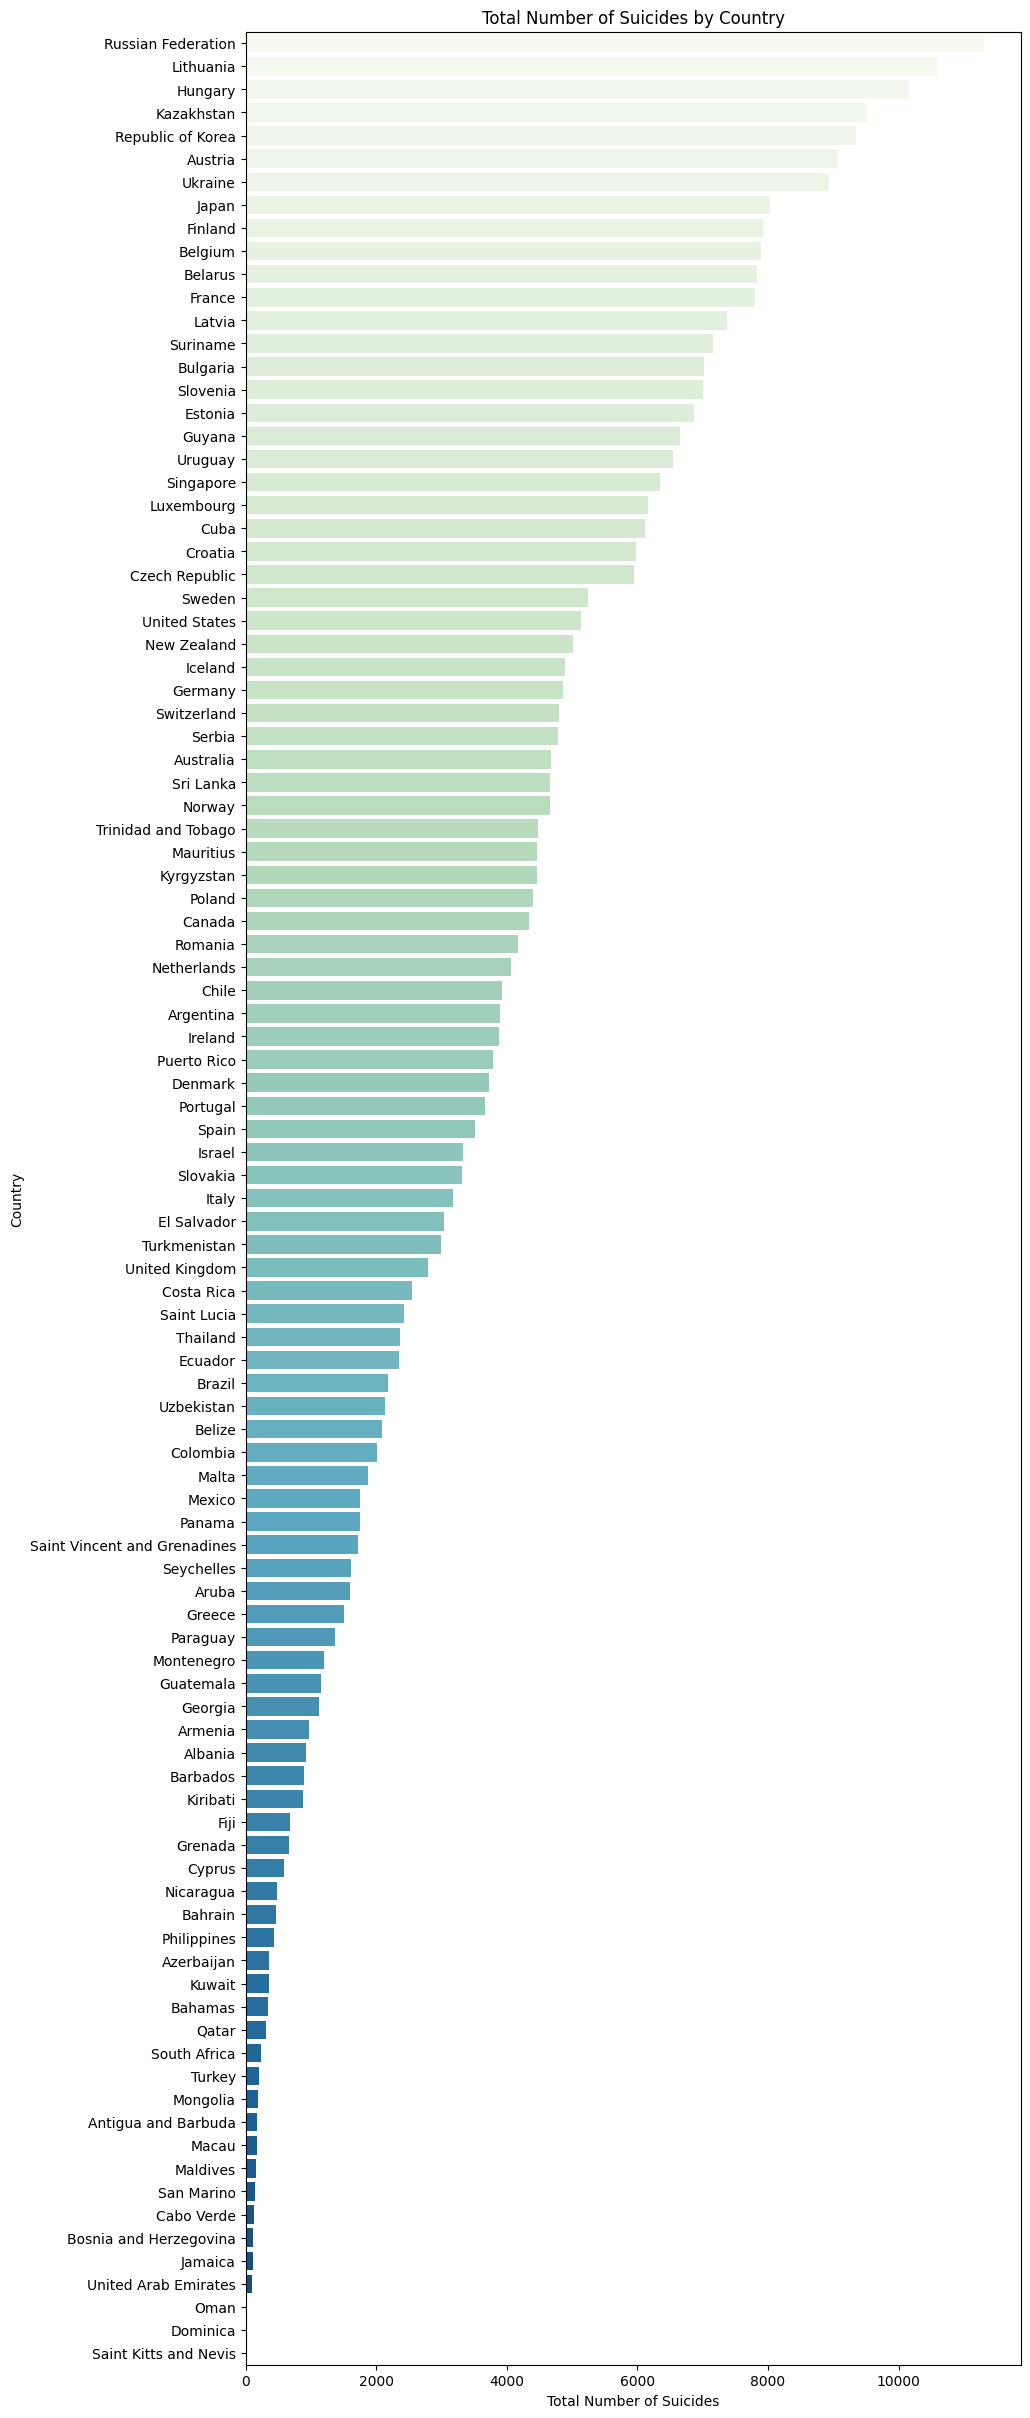

In [121]:
# Agrupar por país y sumar el número de suicidios (sin limitar a los 5 mayores)
country_suicide = tasa_suicidios.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False)

# Crear el gráfico de barras horizontal con todos los países
plt.figure(figsize=(10, len(country_suicide) * 0.3))  # Ajusta el tamaño para acomodar todos los países
sns.barplot(y=country_suicide.index, x=country_suicide.values, palette="GnBu")
plt.ylabel("Country")
plt.xlabel("Total Number of Suicides")
plt.title("Total Number of Suicides by Country")

plt.show()


In [122]:
tasa_por_pais = tasa_suicidios.groupby('country')['suicides/100k pop'].mean().reset_index()

# Ordenar los datos por tasa de suicidios
tasa_por_pais = tasa_por_pais.sort_values(by='suicides/100k pop', ascending=False)

# Crear un gráfico de barras
fig = px.bar(
    tasa_por_pais,
    x='country',
    y='suicides/100k pop',
    title='Tasa de Suicidio por País (por 100k Habitantes)',
    labels={'suicides/100k pop': 'Tasa de Suicidio (por 100k)', 'country': 'País'},
    color='suicides/100k pop',  # Color basado en la tasa de suicidio
    color_continuous_scale=px.colors.sequential.Plasma  # Escala de color
)

# Mostrar el gráfico
fig.show()



In [124]:
import plotly.express as px

# Agrupar por país y sumar el número de suicidios
country_suicides = tasa_suicidios.groupby('country')['suicides_no'].sum().reset_index()

# Crear un mapa coroplético
fig = px.choropleth(
    country_suicides,
    locations='country',
    locationmode='country names',
    color='suicides_no',
    title='Número de Suicidios por País',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Mostrar el gráfico
fig.show()


✨  El siguiente gráficos muestran la tasa de suiciodios a lo largo del tiempo

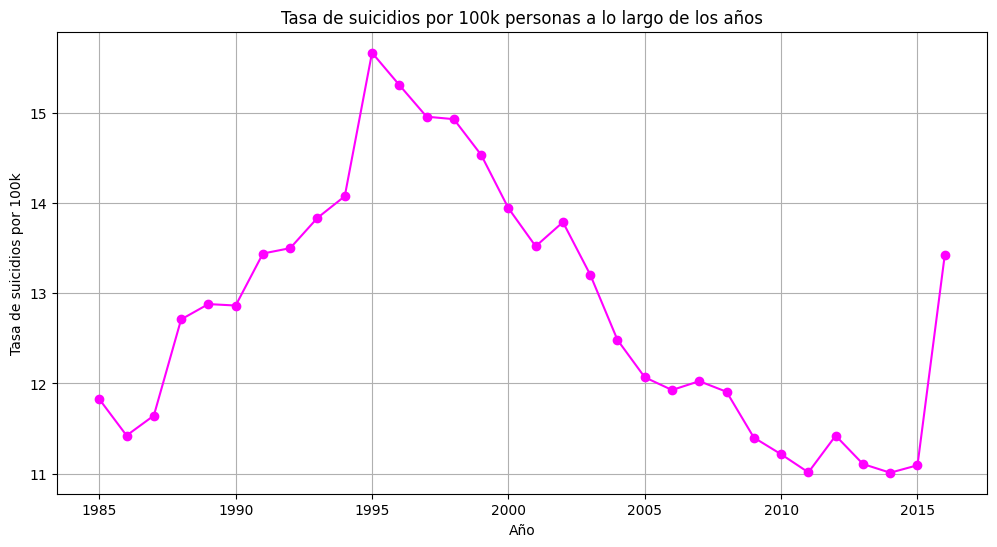

In [125]:
suicidios_tiempo = tasa_suicidios.groupby('year')['suicides/100k pop'].mean()
# Grafico de la tendencia a lo largo del tiempo
plt.figure(figsize=(12, 6))
suicidios_tiempo.plot(kind='line', marker='o', color='magenta')
plt.title('Tasa de suicidios por 100k personas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Tasa de suicidios por 100k')
plt.grid()
plt.show()

✨  Los siguinetes gráficos buscan mostrar los suicidios según el género

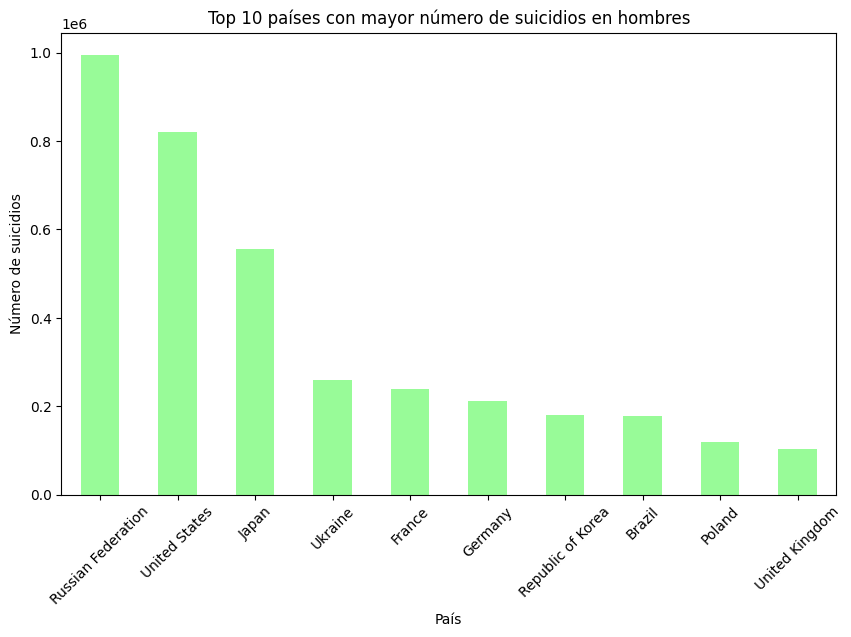

In [152]:
# Filtrar los datos para incluir solo suicidios de mujeres
data_male = tasa_suicidios[tasa_suicidios['sex'] == 'male']

# Agrupar por país y sumar el número de suicidios
suicides_by_country = data_male.groupby('country')['suicides_no'].sum()

# Ordenar en orden descendente y seleccionar los 10 primeros países
top_10_countries_female_suicides = suicides_by_country.sort_values(ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
top_10_countries_female_suicides.plot(kind='bar', color='palegreen')
plt.title('Top 10 países con mayor número de suicidios en hombres')
plt.xlabel('País')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=45)
plt.show()

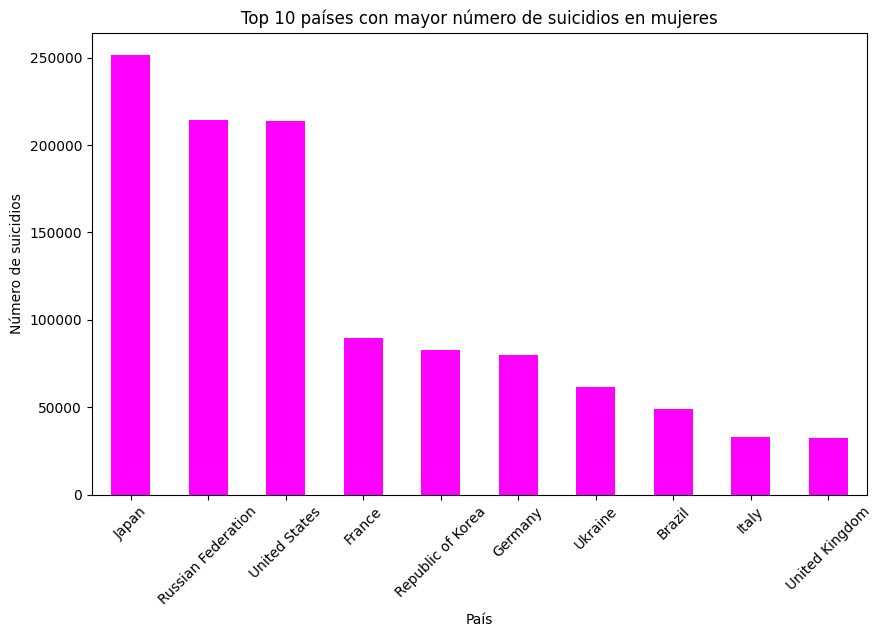

In [151]:
# Filtrar los datos para incluir solo suicidios de mujeres
data_female = tasa_suicidios[tasa_suicidios['sex'] == 'female']

# Agrupar por país y sumar el número de suicidios
suicides_by_country = data_female.groupby('country')['suicides_no'].sum()

# Ordenar en orden descendente y seleccionar los 10 primeros países
top_10_countries_female_suicides = suicides_by_country.sort_values(ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
top_10_countries_female_suicides.plot(kind='bar', color='magenta')
plt.title('Top 10 países con mayor número de suicidios en mujeres')
plt.xlabel('País')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=45)
plt.show()

In [128]:
df_men = tasa_suicidios[tasa_suicidios['sex'] == "male"]
df_women = tasa_suicidios[tasa_suicidios['sex'] == "female"]

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2657605454.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2657605454.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




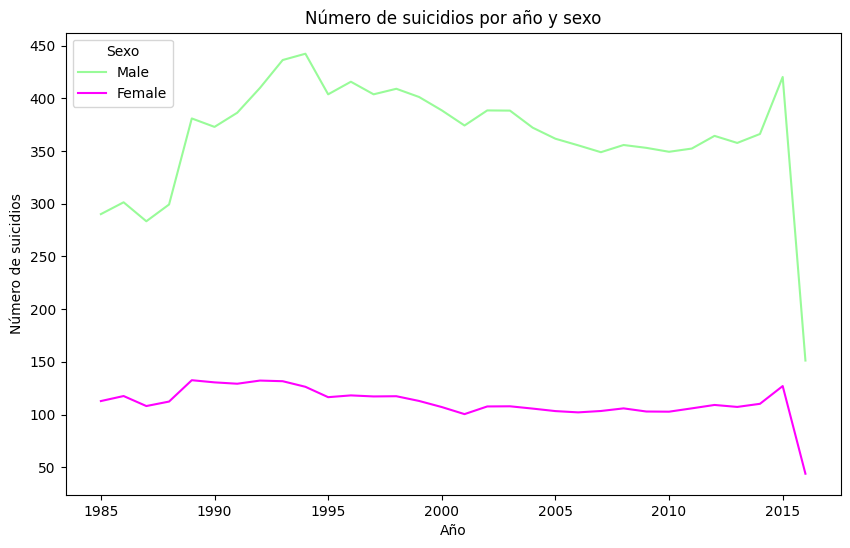

In [129]:
# Crear gráficos de línea separados para hombres y mujeres
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_men, x="year", y="suicides_no", ci=None, label="Male", color="palegreen")
sns.lineplot(data=df_women, x="year", y="suicides_no", ci=None, label="Female", color="magenta")

# Añadir título y etiquetas
plt.title("Número de suicidios por año y sexo")
plt.xlabel("Año")
plt.ylabel("Número de suicidios")
plt.legend(title="Sexo")
plt.show()

In [130]:
suicidios_por_genero = tasa_suicidios.groupby('sex')['suicides_no'].sum()
print("\nTotal de suicidios por género:")
print(suicidios_por_genero)


Total de suicidios por género:
sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


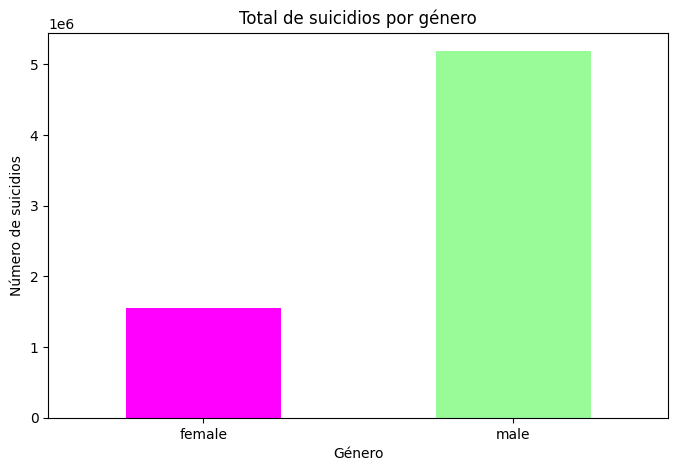

In [131]:
plt.figure(figsize=(8, 5))
suicidios_por_genero.plot(kind='bar', color=['magenta', 'palegreen'])
plt.title('Total de suicidios por género')
plt.xlabel('Género')
plt.ylabel('Número de suicidios')
plt.xticks(rotation=0)
plt.show()

✨  Los siguientes 2 gráfico muestra la distribución de la tasa de suicidios, desglosada por generación

In [132]:
orden_generaciones = ['Generation Z', 'Millennials', 'Generation X', 'Boomers', 'Silent', 'G.I. Generation']
tasa_suicidios['generation'] = pd.Categorical(tasa_suicidios['generation'], categories=orden_generaciones, ordered=True)
suicidios_por_generacion = tasa_suicidios.groupby('generation')['suicides_no'].sum()

print("Suicidios por generación (ordenados cronológicamente):")
print(suicidios_por_generacion)


Suicidios por generación (ordenados cronológicamente):
generation
Generation Z         15906
Millennials              0
Generation X       1532804
Boomers            2284498
Silent             1781744
G.I. Generation     510009
Name: suicides_no, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2093603075.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



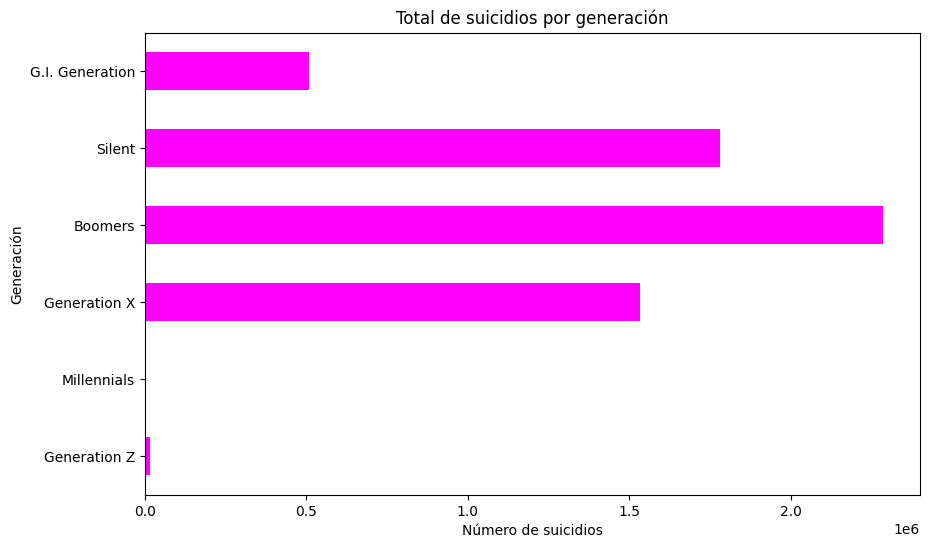

In [133]:
# Gráfico de barras horizontales para suicidios por generación
plt.figure(figsize=(10, 6))
suicidios_por_generacion.plot(kind='barh', color='magenta')
plt.title('Total de suicidios por generación')
plt.xlabel('Número de suicidios')
plt.ylabel('Generación')
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\1640414894.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




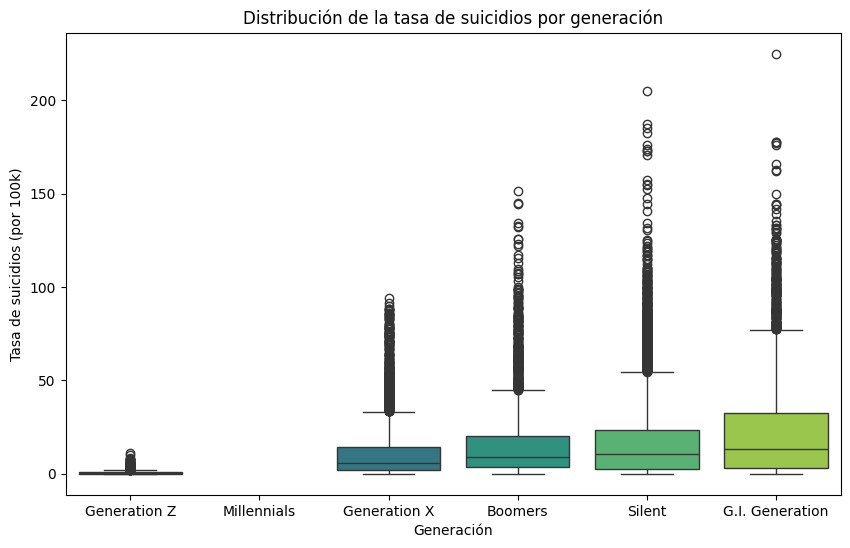

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tasa_suicidios, x='generation', y='suicides/100k pop', palette='viridis')
plt.title('Distribución de la tasa de suicidios por generación')
plt.xlabel('Generación')
plt.ylabel('Tasa de suicidios (por 100k)')
plt.show()

✨  Mapa de calor para evidenciar la edad en que las personas más cometen suicidios 

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\723916428.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



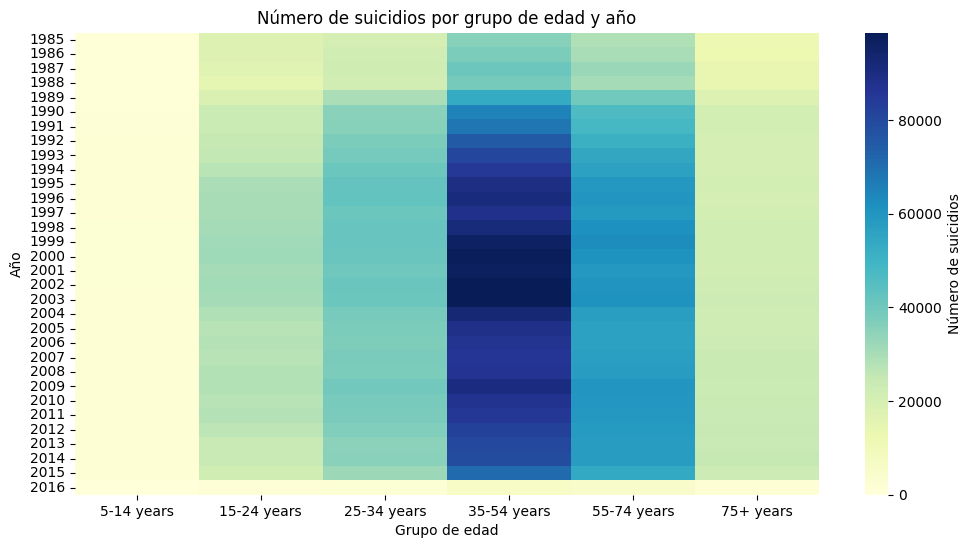

In [135]:
# Ordena los grupos de edad antes de usar `unstack()`
tasa_suicidios['age'] = pd.Categorical(tasa_suicidios['age'], categories=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], ordered=True)

# Agrupa y crea el mapa de calor nuevamente
mapa_calor = tasa_suicidios.groupby(['year', 'age'])['suicides_no'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(mapa_calor, cmap="YlGnBu", cbar_kws={'label': 'Número de suicidios'})
plt.title('Número de suicidios por grupo de edad y año')
plt.xlabel('Grupo de edad')
plt.ylabel('Año')
plt.show()


✨  Corellación entre las variables 

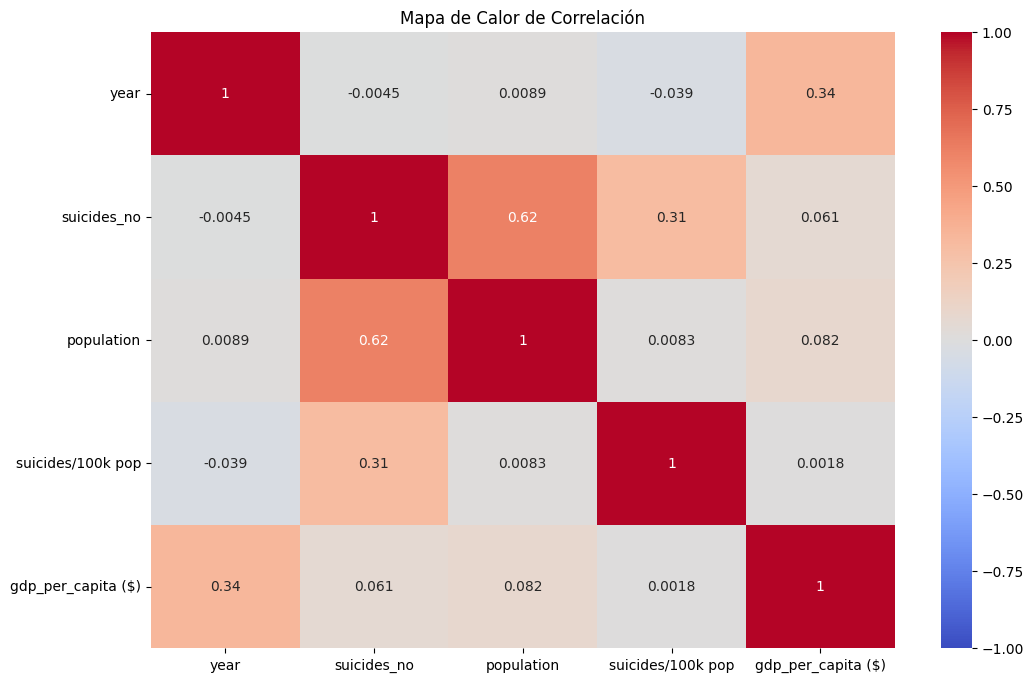

In [136]:
# Seleccionar solo las columnas numéricas antes de calcular la correlación
correlation_matrix = tasa_suicidios.select_dtypes(include=['float', 'int']).corr()

# Graficar el mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()


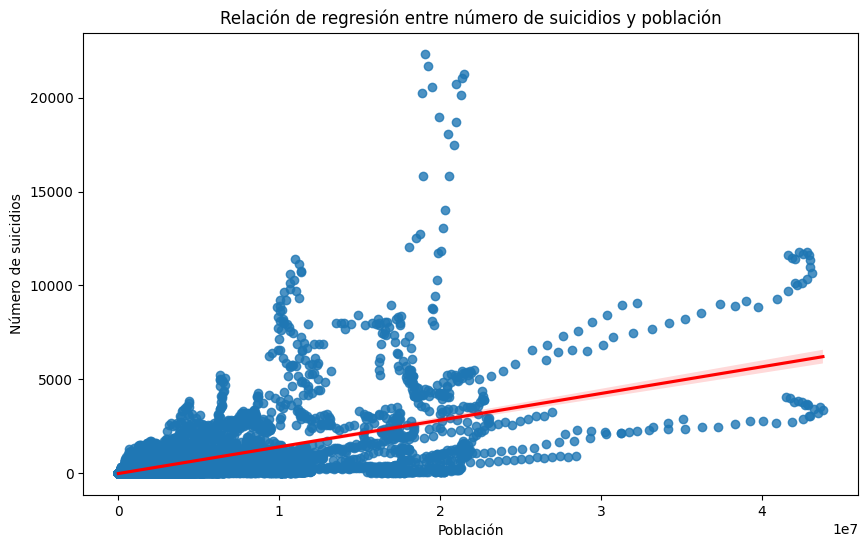

In [137]:
plt.figure(figsize=(10, 6))
sns.regplot(data=tasa_suicidios, x='population', y='suicides_no', line_kws={'color': 'red'})
plt.title('Relación de regresión entre número de suicidios y población')
plt.xlabel('Población')
plt.ylabel('Número de suicidios')
plt.show()

In [138]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(tasa_suicidios['population'], tasa_suicidios['suicides_no'])
print(f'Correlación de Pearson entre población y número de suicidios: {correlation:.2f}, p-value: {p_value:.4f}')


Correlación de Pearson entre población y número de suicidios: 0.62, p-value: 0.0000


In [139]:
correlation, p_value = pearsonr(tasa_suicidios['gdp_per_capita ($)'], tasa_suicidios['suicides_no'])
print(f'Correlación de Pearson entre pib per capita y número de suicidios: {correlation:.2f}, p-value: {p_value:.4f}')

Correlación de Pearson entre pib per capita y número de suicidios: 0.06, p-value: 0.0000


✨  El siguiente gráfico en el eje Y muestra una lista de países, ordenados de arriba hacia abajo según el número total de suicidios, desde el país con el mayor número de suicidios hasta el que tiene el menor. Esto permite una comparación rápida y clara de cuáles son los países con mayores tasas de suicidio. El eje X representa el PIB per cápita en dólares. Esto permite ver cuánto se relaciona el ingreso promedio por persona en cada país con el número total de suicidios.

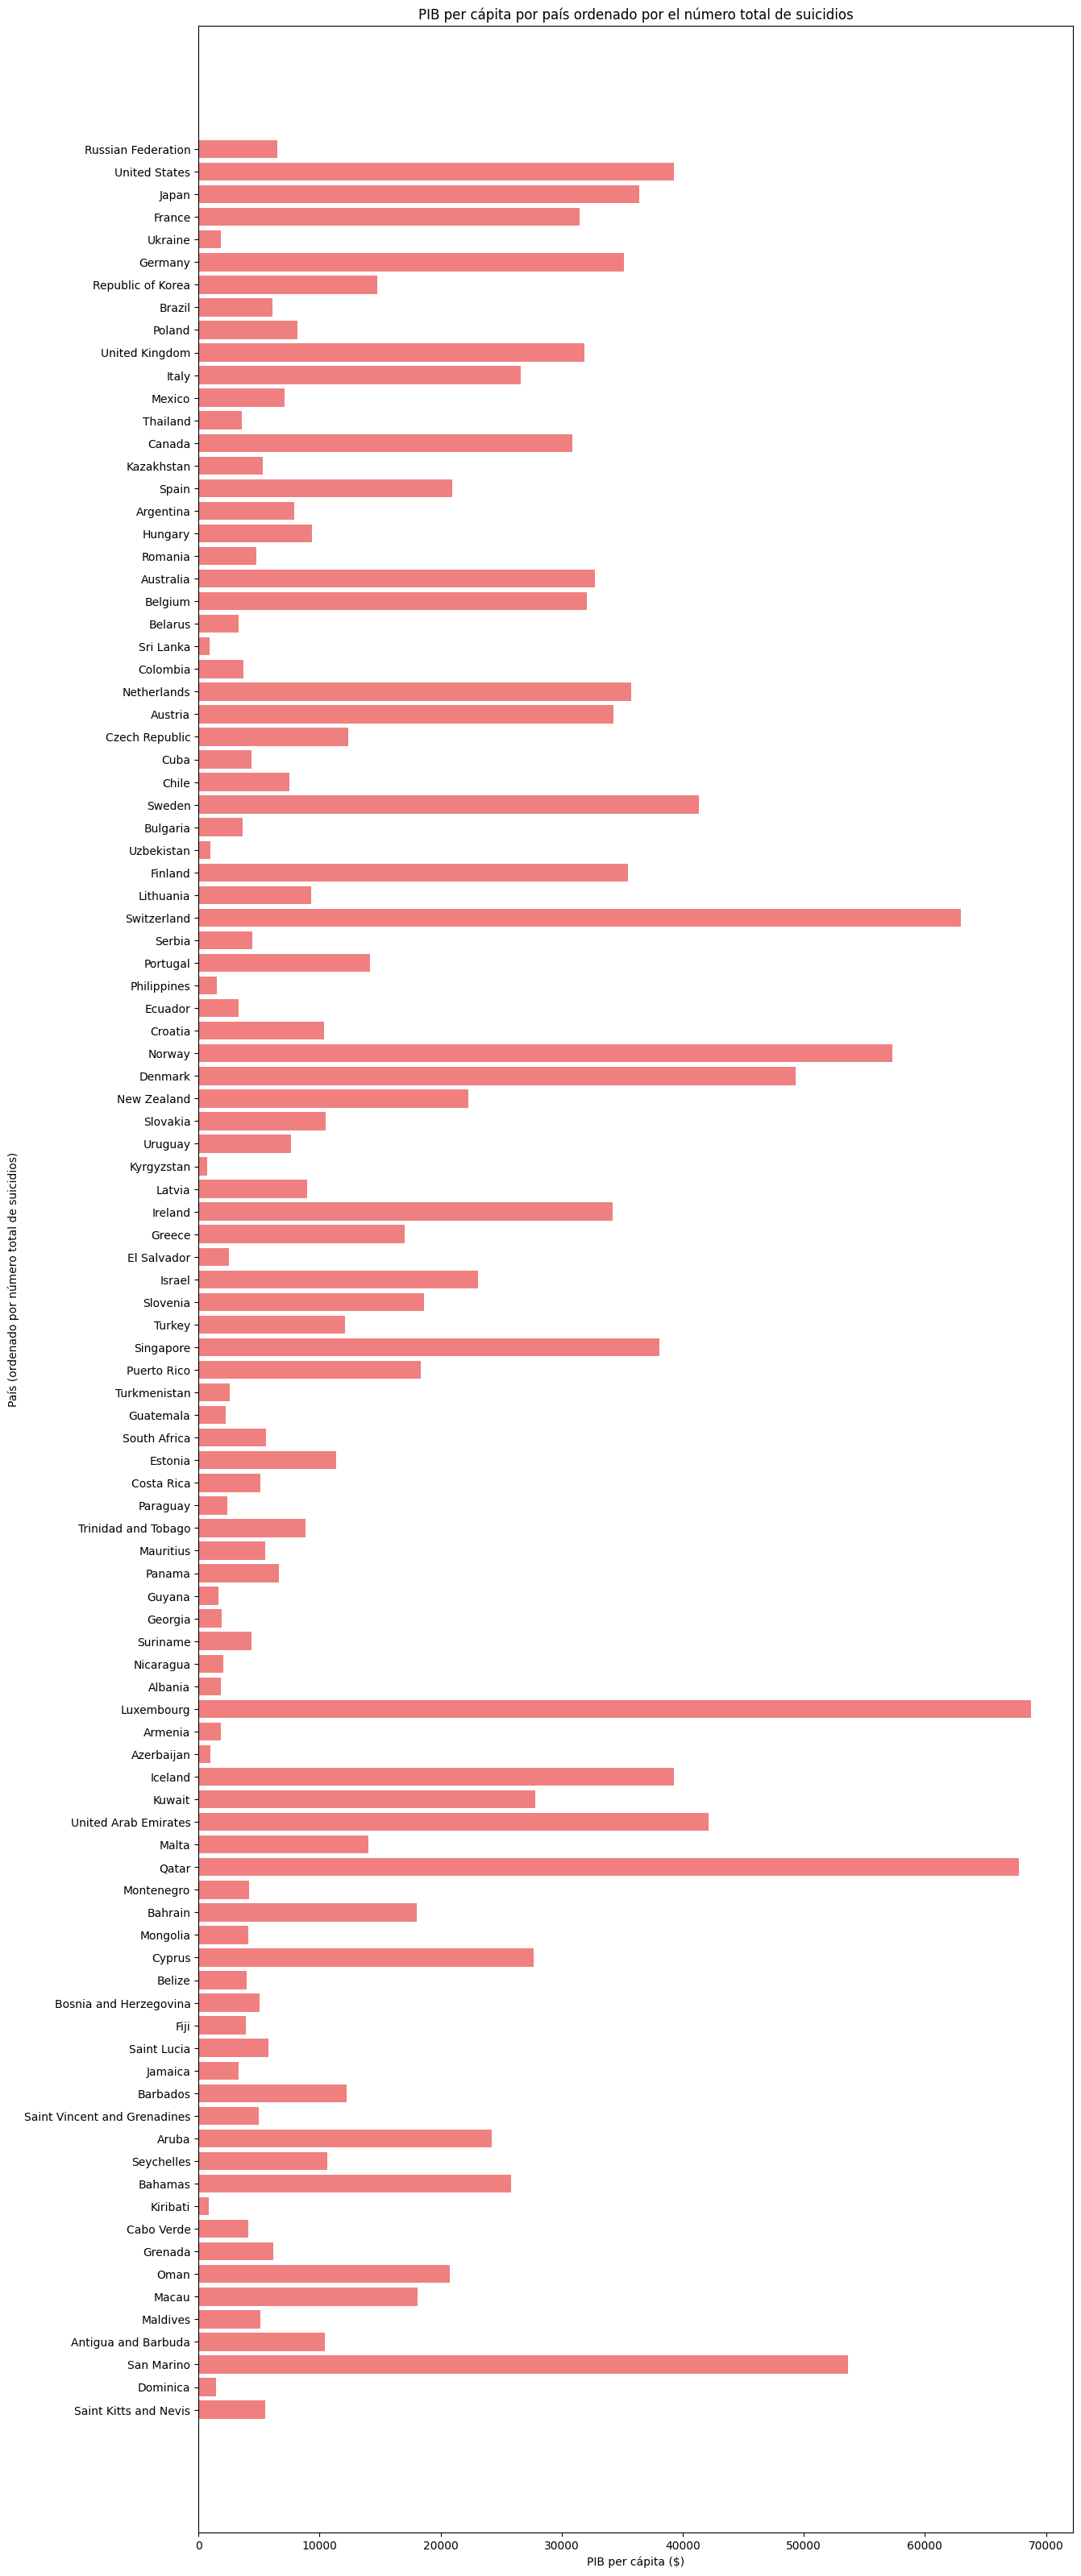

In [140]:
data_by_country = tasa_suicidios.groupby('country').agg({
    'suicides_no': 'sum',
    'gdp_per_capita ($)': 'mean'
}).sort_values(by='suicides_no', ascending=False)  # Ordenado por número de suicidios de mayor a menor

# Ajustar el tamaño de la figura para que sea más alta
plt.figure(figsize=(14, len(data_by_country) * 0.4))  # Ajusta el factor multiplicador según sea necesario

# Crear gráfico de barras horizontal
plt.barh(data_by_country.index, data_by_country['gdp_per_capita ($)'], color='lightcoral')
plt.title('PIB per cápita por país ordenado por el número total de suicidios')
plt.ylabel('País (ordenado por número total de suicidios)')
plt.xlabel('PIB per cápita ($)')
plt.gca().invert_yaxis()  # Invertir el eje y para que el país con más suicidios aparezca arriba
plt.show()


✨ El siguiente gráfico es útil para visualizar tanto la distribución general de los datos como la presencia de valores atípicos.

In [141]:
# Crear un histograma del número de suicidios
fig = px.histogram(
    tasa_suicidios, 
    x="suicides_no",  # Cambia esta columna por la que quieres analizar
    nbins=50,
    marginal="box",  # Puedes elegir "rug", "box" o "violin" para mostrar una visualización adicional
    width=640, 
    height=480,
    title="Distribución del número de suicidios",
)

fig.show()


✨  La siguiente gráfica muestra la distribución del número de suicidios en los 10 países con la mayor cantidad de suicidios. Aquí se han transformado los datos con una escala logarítmica en el eje y, lo que permite ver mejor las variaciones en los valores, especialmente cuando estos están distribuidos en un rango amplio.

In [142]:
top_countries = tasa_suicidios.groupby("country")["suicides_no"].sum().nlargest(10).index
data_top_countries = tasa_suicidios[tasa_suicidios["country"].isin(top_countries)]

# Crear boxplot del número de suicidios para los países con más suicidios
fig = px.box(
    data_top_countries, 
    x="country", 
    y="suicides_no", 
    width=640, 
    height=480,
    log_y=True
)
fig.update_layout(title="Distribución del número de suicidios en los 10 países con más suicidios")
fig.show()
